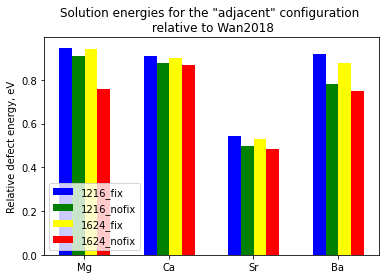

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            try:
                return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])
            except:
                continue
            
def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_adjacent = [fix1216['./1216_fix/mg_adjacent.out'] + na2o - mgo - 2.01, fix1216['./1216_fix/ca_adjacent.out'] + na2o - cao - 1.61, 
                    fix1216['./1216_fix/sr_adjacent.out'] + na2o - sro - 1.28, fix1216['./1216_fix/ba_adjacent.out'] + na2o - bao - 0.773]
nofix1216_adjacent = [nofix1216['./1216_nofix/mg_adjacent.out'] + na2o - mgo - 2.01, nofix1216['./1216_nofix/ca_adjacent.out'] + na2o - cao - 1.61, 
                      nofix1216['./1216_nofix/sr_adjacent.out'] + na2o - sro - 1.28, nofix1216['./1216_nofix/ba_adjacent.out'] + na2o - bao - 0.773]
fix1624_adjacent = [fix1624['./1624_fix/mg_adjacent.out'] + na2o - mgo - 2.01, fix1624['./1624_fix/ca_adjacent.out'] + na2o - cao - 1.61, 
                    fix1624['./1624_fix/sr_adjacent.out'] + na2o - sro - 1.28, fix1624['./1624_fix/ba_adjacent.out'] + na2o - bao - 0.773]
nofix1624_adjacent = [nofix1624['./1624_nofix/mg_adjacent.out'] + na2o - mgo - 2.01, nofix1624['./1624_nofix/ca_adjacent.out'] + na2o - cao - 1.61, 
                      nofix1624['./1624_nofix/sr_adjacent.out'] + na2o - sro - 1.28, nofix1624['./1624_nofix/ba_adjacent.out'] + na2o - bao - 0.773]
wan = [2.01, 1.61, 1.28, 0.773]

labels = ['Mg', 'Ca', 'Sr', 'Ba']

barWidth = 0.15

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_adjacent, width = 0.15, color='blue')
plt.bar(r2, nofix1216_adjacent, width = 0.15, color='green')
plt.bar(r3, fix1624_adjacent, width = 0.15, color='yellow')
plt.bar(r4, nofix1624_adjacent, width = 0.15, color='red')
plt.xticks([0.22, 1.22, 2.22, 3.22], labels)
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_fix', '1624_nofix', 'Wan2018'], loc = 'lower left')
plt.title('Solution energies for the "adjacent" configuration \n relative to Wan2018')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/adjacent_relative.jpg', bbox_inches='tight', dpi=500)

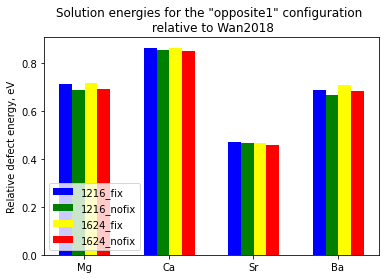

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_opposite1 = [fix1216['./1216_fix/mg_opposite1.out'] + na2o - mgo - 1.93, fix1216['./1216_fix/ca_opposite1.out'] + na2o - cao - 1.56, 
                    fix1216['./1216_fix/sr_opposite1.out'] + na2o - sro - 1.35, fix1216['./1216_fix/ba_opposite1.out'] + na2o - bao - 1.06]
nofix1216_opposite1 = [nofix1216['./1216_nofix/mg_opposite1.out'] + na2o - mgo - 1.93, nofix1216['./1216_nofix/ca_opposite1.out'] + na2o - cao - 1.56, 
                      nofix1216['./1216_nofix/sr_opposite1.out'] + na2o - sro - 1.35, nofix1216['./1216_nofix/ba_opposite1.out'] + na2o - bao - 1.06]
fix1624_opposite1 = [fix1624['./1624_fix/mg_opposite1.out'] + na2o - mgo - 1.93, fix1624['./1624_fix/ca_opposite1.out'] + na2o - cao - 1.56, 
                    fix1624['./1624_fix/sr_opposite1.out'] + na2o - sro - 1.35, fix1624['./1624_fix/ba_opposite1.out'] + na2o - bao - 1.06]
nofix1624_opposite1 = [nofix1624['./1624_nofix/mg_opposite1.out'] + na2o - mgo - 1.93, nofix1624['./1624_nofix/ca_opposite1.out'] + na2o - cao - 1.56, 
                      nofix1624['./1624_nofix/sr_opposite1.out'] + na2o - sro - 1.35, nofix1624['./1624_nofix/ba_opposite1.out'] + na2o - bao - 1.06]
wan = [1.93, 1.56, 1.35, 1.06]

labels = ['Mg', 'Ca', 'Sr', 'Ba']

barWidth = 0.15

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_opposite1, width = 0.15, color='blue')
plt.bar(r2, nofix1216_opposite1, width = 0.15, color='green')
plt.bar(r3, fix1624_opposite1, width = 0.15, color='yellow')
plt.bar(r4, nofix1624_opposite1, width = 0.15, color='red')
plt.xticks([0.22, 1.22, 2.22, 3.22], labels)
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_fix', '1624_nofix', 'Wan2018'], loc = 'lower left')
plt.title('Solution energies for the "opposite1" configuration \n relative to Wan2018')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/opposite1_relative.jpg', bbox_inches='tight', dpi=500)

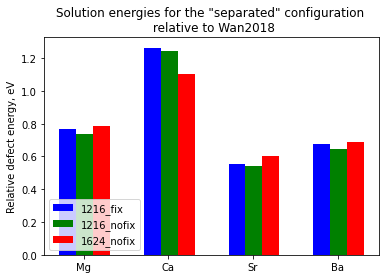

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_separated = [fix1216['./1216_fix/mg_seperated.out'] + na2o - mgo - 2.18, fix1216['./1216_fix/ca_seperated.out'] + na2o - cao - 1.67, 
                    fix1216['./1216_fix/sr_seperated.out'] + na2o - sro - 1.44, fix1216['./1216_fix/ba_seperated.out'] + na2o - bao - 1.19]
nofix1216_separated = [nofix1216['./1216_nofix/mg_seperated.out'] + na2o - mgo - 2.18, nofix1216['./1216_nofix/ca_seperated.out'] + na2o - cao - 1.67, 
                      nofix1216['./1216_nofix/sr_seperated.out'] + na2o - sro - 1.44, nofix1216['./1216_nofix/ba_seperated.out'] + na2o - bao - 1.19]
nofix1624_separated = [nofix1624['./1624_nofix/mg_seperated.out'] + na2o - mgo - 2.18, nofix1624['./1624_nofix/ca_seperated.out'] + na2o - cao - 1.67, 
                      nofix1624['./1624_nofix/sr_seperated.out'] + na2o - sro - 1.44, nofix1624['./1624_nofix/ba_seperated.out'] + na2o - bao - 1.19]
wan = [2.18, 1.67, 1.44, 1.19]

labels = ['Mg', 'Ca', 'Sr', 'Ba']

barWidth = 0.2

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_separated, width = 0.2, color='blue')
plt.bar(r2, nofix1216_separated, width = 0.2, color='green')
plt.bar(r3, nofix1624_separated, width = 0.2, color='red')
plt.xticks([0.19, 1.19, 2.19, 3.19], labels)
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_nofix', 'Wan2018'], loc = 'lower left')
plt.title('Solution energies for the "separated" configuration \n relative to Wan2018')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/separated_relative.jpg', bbox_inches='tight', dpi=500)

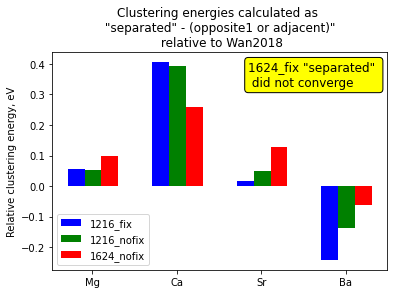

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_solution = [fix1216['./1216_fix/mg_seperated.out'] - fix1216['./1216_fix/mg_opposite1.out'] - 0.246, fix1216['./1216_fix/ca_seperated.out'] - fix1216['./1216_fix/ca_opposite1.out'] - 0.104, 
                    fix1216['./1216_fix/sr_seperated.out'] - fix1216['./1216_fix/sr_adjacent.out'] - 0.152, fix1216['./1216_fix/ba_seperated.out'] - fix1216['./1216_fix/ba_adjacent.out'] - 0.419]
nofix1216_solution = [nofix1216['./1216_nofix/mg_seperated.out'] - nofix1216['./1216_nofix/mg_opposite1.out'] - 0.246, nofix1216['./1216_nofix/ca_seperated.out'] - nofix1216['./1216_nofix/ca_opposite1.out'] - 0.104, 
                      nofix1216['./1216_nofix/sr_seperated.out'] - nofix1216['./1216_nofix/sr_adjacent.out'] - 0.152, nofix1216['./1216_nofix/ba_seperated.out'] - nofix1216['./1216_nofix/ba_adjacent.out'] - 0.419]
nofix1624_solution = [nofix1624['./1624_nofix/mg_seperated.out'] - nofix1624['./1624_nofix/mg_opposite1.out'] - 0.246, nofix1624['./1624_nofix/ca_seperated.out'] - nofix1624['./1624_nofix/ca_opposite1.out'] - 0.104, 
                      nofix1624['./1624_nofix/sr_seperated.out'] - nofix1624['./1624_nofix/sr_adjacent.out'] - 0.152, nofix1624['./1624_nofix/ba_seperated.out'] - nofix1624['./1624_nofix/ba_adjacent.out'] - 0.419]
wan = [0.246, 0.104, 0.152, 0.419]

labels = ['Mg', 'Ca', 'Sr', 'Ba']

barWidth = 0.2

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

fig, ax = plt.subplots()

plt.bar(r1, fix1216_solution, width = 0.2, color='blue')
plt.bar(r2, nofix1216_solution, width = 0.2, color='green')
plt.bar(r3, nofix1624_solution, width = 0.2, color='red')
plt.xticks([0.19, 1.19, 2.19, 3.19], labels)
plt.ylabel('Relative clustering energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_nofix', 'Wan2018'], loc = 'lower left')
plt.title('Clustering energies calculated as \n "separated" - (opposite1 or adjacent)" \n relative to Wan2018')

textstr = '1624_fix "separated" \n did not converge'

ax.text(0.585, 0.96, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round'))

plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/clustering_relative.jpg', bbox_inches='tight', dpi=500)

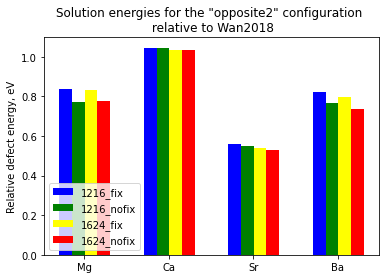

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_opposite2 = [fix1216['./1216_fix/mg_opposite2.out'] + na2o - mgo - 2.21, fix1216['./1216_fix/ca_opposite2.out'] + na2o - cao - 1.82, 
                    fix1216['./1216_fix/sr_opposite2.out'] + na2o - sro - 1.61, fix1216['./1216_fix/ba_opposite2.out'] + na2o - bao - 1.23]
nofix1216_opposite2 = [nofix1216['./1216_nofix/mg_opposite2.out'] + na2o - mgo - 2.21, nofix1216['./1216_nofix/ca_opposite2.out'] + na2o - cao - 1.82, 
                      nofix1216['./1216_nofix/sr_opposite2.out'] + na2o - sro - 1.61, nofix1216['./1216_nofix/ba_opposite2.out'] + na2o - bao - 1.23]
fix1624_opposite2 = [fix1624['./1624_fix/mg_opposite2.out'] + na2o - mgo - 2.21, fix1624['./1624_fix/ca_opposite2.out'] + na2o - cao - 1.82, 
                    fix1624['./1624_fix/sr_opposite2.out'] + na2o - sro - 1.61, fix1624['./1624_fix/ba_opposite2.out'] + na2o - bao - 1.23]
nofix1624_opposite2 = [nofix1624['./1624_nofix/mg_opposite2.out'] + na2o - mgo - 2.21, nofix1624['./1624_nofix/ca_opposite2.out'] + na2o - cao - 1.82, 
                      nofix1624['./1624_nofix/sr_opposite2.out'] + na2o - sro - 1.61, nofix1624['./1624_nofix/ba_opposite2.out'] + na2o - bao - 1.23]
wan = [2.21, 1.82, 1.61, 1.23]

labels = ['Mg', 'Ca', 'Sr', 'Ba']

barWidth = 0.15

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_opposite2, width = 0.15, color='blue')
plt.bar(r2, nofix1216_opposite2, width = 0.15, color='green')
plt.bar(r3, fix1624_opposite2, width = 0.15, color='yellow')
plt.bar(r4, nofix1624_opposite2, width = 0.15, color='red')
plt.xticks([0.22, 1.22, 2.22, 3.22], labels)
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_fix', '1624_nofix', 'Wan2018'], loc = 'lower left')
plt.title('Solution energies for the "opposite2" configuration \n relative to Wan2018')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/opposite2_relative.jpg', bbox_inches='tight', dpi=500)

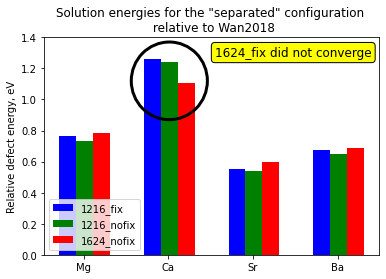

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_separated = [fix1216['./1216_fix/mg_seperated.out'] + na2o - mgo - 2.18, fix1216['./1216_fix/ca_seperated.out'] + na2o - cao - 1.67, 
                    fix1216['./1216_fix/sr_seperated.out'] + na2o - sro - 1.44, fix1216['./1216_fix/ba_seperated.out'] + na2o - bao - 1.19]
nofix1216_separated = [nofix1216['./1216_nofix/mg_seperated.out'] + na2o - mgo - 2.18, nofix1216['./1216_nofix/ca_seperated.out'] + na2o - cao - 1.67, 
                      nofix1216['./1216_nofix/sr_seperated.out'] + na2o - sro - 1.44, nofix1216['./1216_nofix/ba_seperated.out'] + na2o - bao - 1.19]
nofix1624_separated = [nofix1624['./1624_nofix/mg_seperated.out'] + na2o - mgo - 2.18, nofix1624['./1624_nofix/ca_seperated.out'] + na2o - cao - 1.67, 
                      nofix1624['./1624_nofix/sr_seperated.out'] + na2o - sro - 1.44, nofix1624['./1624_nofix/ba_seperated.out'] + na2o - bao - 1.19]
wan = [2.18, 1.67, 1.44, 1.19]

labels = ['Mg', 'Ca', 'Sr', 'Ba']

barWidth = 0.2

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

fig, ax = plt.subplots()

ax.bar(r1, fix1216_separated, width = 0.2, color='blue')
ax.bar(r2, nofix1216_separated, width = 0.2, color='green')
ax.bar(r3, nofix1624_separated, width = 0.2, color='red')
plt.xticks([0.19, 1.19, 2.19, 3.19], labels)
plt.ylim(0, 1.4)
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_nofix', 'Wan2018'], loc = 'lower left')
plt.title('Solution energies for the "separated" configuration \n relative to Wan2018')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/separated_relative.jpg', bbox_inches='tight', dpi=500)

circle = patches.Ellipse((1.2, 1.12), 0.9, 0.5, edgecolor='black', facecolor='NONE', lw=3)

textstr = '1624_fix did not converge'

ax.text(0.51, 0.96, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round'))

ax.add_patch(circle)

plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/separated_relative.jpg', bbox_inches='tight', dpi=500)

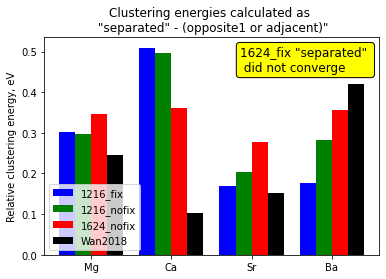

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_solution = [fix1216['./1216_fix/mg_seperated.out'] - fix1216['./1216_fix/mg_opposite1.out'], fix1216['./1216_fix/ca_seperated.out'] - fix1216['./1216_fix/ca_opposite1.out'], 
                    fix1216['./1216_fix/sr_seperated.out'] - fix1216['./1216_fix/sr_adjacent.out'], fix1216['./1216_fix/ba_seperated.out'] - fix1216['./1216_fix/ba_adjacent.out']]
nofix1216_solution = [nofix1216['./1216_nofix/mg_seperated.out'] - nofix1216['./1216_nofix/mg_opposite1.out'], nofix1216['./1216_nofix/ca_seperated.out'] - nofix1216['./1216_nofix/ca_opposite1.out'], 
                      nofix1216['./1216_nofix/sr_seperated.out'] - nofix1216['./1216_nofix/sr_adjacent.out'], nofix1216['./1216_nofix/ba_seperated.out'] - nofix1216['./1216_nofix/ba_adjacent.out']]
nofix1624_solution = [nofix1624['./1624_nofix/mg_seperated.out'] - nofix1624['./1624_nofix/mg_opposite1.out'], nofix1624['./1624_nofix/ca_seperated.out'] - nofix1624['./1624_nofix/ca_opposite1.out'], 
                      nofix1624['./1624_nofix/sr_seperated.out'] - nofix1624['./1624_nofix/sr_adjacent.out'], nofix1624['./1624_nofix/ba_seperated.out'] - nofix1624['./1624_nofix/ba_adjacent.out']]
wan = [0.246, 0.104, 0.152, 0.419]

labels = ['Mg', 'Ca', 'Sr', 'Ba']

barWidth = 0.2

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

fig, ax = plt.subplots()

plt.bar(r1, fix1216_solution, width = 0.2, color='blue')
plt.bar(r2, nofix1216_solution, width = 0.2, color='green')
plt.bar(r3, nofix1624_solution, width = 0.2, color='red')
plt.bar(r4, wan, width = 0.2, color='black')
plt.xticks([0.3, 1.3, 2.3, 3.3], labels)
plt.ylabel('Relative clustering energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_nofix', 'Wan2018'], loc = 'lower left')
plt.title('Clustering energies calculated as \n "separated" - (opposite1 or adjacent)"')

textstr = '1624_fix "separated" \n did not converge'

ax.text(0.585, 0.96, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round'))

plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/clustering.jpg', bbox_inches='tight', dpi=500)

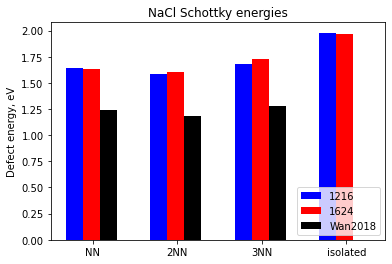

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

x1216_schottky = [fix1216['./1216_fix/NN.out'] + nacl, fix1216['./1216_fix/2NN.out'] + nacl, fix1216['./1216_fix/3NN.out'] + nacl, 
                  fix1216['./1216_fix/na3ocl_na_vac.out'] + fix1216['./1216_fix/na3ocl_cl_vac.out'] + nacl]
x1624_schottky = [fix1624['./1624_fix/NN.out'] + nacl, fix1624['./1624_fix/2NN.out'] + nacl, fix1624['./1624_fix/3NN.out'] + nacl,
                  fix1624['./1624_fix/na3ocl_na_vac.out'] + fix1624['./1624_fix/na3ocl_cl_vac.out'] + nacl]

wan = [1.24, 1.18, 1.28, 0]

labels = ['NN', '2NN', '3NN', 'isolated']

barWidth = 0.2

r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, x1216_schottky, width = 0.2, color='blue')
plt.bar(r2, x1624_schottky, width = 0.2, color='red')
plt.bar(r3, wan, width = 0.2, color='black')
plt.xticks([0.22, 1.22, 2.22, 3.22], labels)
plt.ylabel('Defect energy, eV')
plt.legend(labels=['1216', '1624', 'Wan2018'], loc = 'lower right')
plt.title('NaCl Schottky energies')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/schottky_nacl_absolute.jpg', bbox_inches='tight', dpi=500)

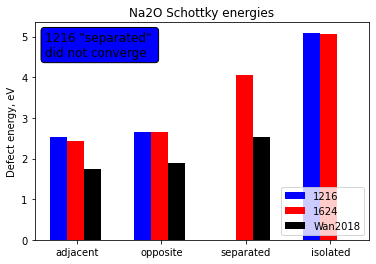

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

x1216_schottky = [fix1216['./1216_fix/na2o_adjacent.out'] + na2o, fix1216['./1216_fix/na2o_opposite.out'] + na2o, 0, 
                  2 * fix1216['./1216_fix/na3ocl_na_vac.out'] + fix1216['./1216_fix/na3ocl_o_vac.out'] + na2o]
x1624_schottky = [fix1624['./1624_fix/na2o_adjacent.out'] + na2o, fix1624['./1624_fix/na2o_opposite.out'] + na2o, fix1624['./1624_fix/na2o_separated.out'] + na2o,
                  2 * fix1624['./1624_fix/na3ocl_na_vac.out'] + fix1624['./1624_fix/na3ocl_o_vac.out'] + na2o]

wan = [1.74, 1.88, 2.52, 0]

labels = ['adjacent', 'opposite', 'separated', 'isolated']

barWidth = 0.2

r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig, ax = plt.subplots()

plt.bar(r1, x1216_schottky, width = 0.2, color='blue')
plt.bar(r2, x1624_schottky, width = 0.2, color='red')
plt.bar(r3, wan, width = 0.2, color='black')
plt.xticks([0.22, 1.22, 2.22, 3.22], labels)
plt.ylabel('Defect energy, eV')
plt.legend(labels=['1216', '1624', 'Wan2018'], loc = 'lower right')
plt.title('Na2O Schottky energies')

textstr = '1216 "separated" \ndid not converge'

ax.text(0.03, 0.96, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='blue', edgecolor='black', boxstyle='round'))

plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/schottky_na2o_absolute.jpg', bbox_inches='tight', dpi=500)

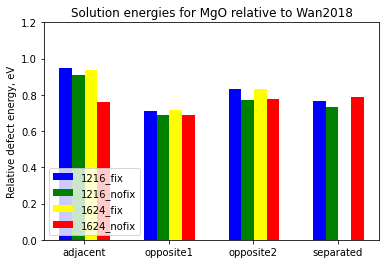

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_mg = [fix1216['./1216_fix/mg_adjacent.out'] + na2o - mgo - 2.01, fix1216['./1216_fix/mg_opposite1.out'] + na2o - mgo - 1.93, 
                    fix1216['./1216_fix/mg_opposite2.out'] + na2o - mgo - 2.21, fix1216['./1216_fix/mg_seperated.out'] + na2o - mgo - 2.18]
nofix1216_mg = [nofix1216['./1216_nofix/mg_adjacent.out'] + na2o - mgo - 2.01, nofix1216['./1216_nofix/mg_opposite1.out'] + na2o - mgo - 1.93, 
                      nofix1216['./1216_nofix/mg_opposite2.out'] + na2o - mgo - 2.21, nofix1216['./1216_nofix/mg_seperated.out'] + na2o - mgo - 2.18]
fix1624_mg = [fix1624['./1624_fix/mg_adjacent.out'] + na2o - mgo - 2.01, fix1624['./1624_fix/mg_opposite1.out'] + na2o - mgo - 1.93, 
                    fix1624['./1624_fix/mg_opposite2.out'] + na2o - mgo - 2.21, 0]
nofix1624_mg = [nofix1624['./1624_nofix/mg_adjacent.out'] + na2o - mgo - 2.01, nofix1624['./1624_nofix/mg_opposite1.out'] + na2o - mgo - 1.93, 
                      nofix1624['./1624_nofix/mg_opposite2.out'] + na2o - mgo - 2.21, nofix1624['./1624_nofix/mg_seperated.out'] + na2o - mgo - 2.18]
wan = [2.01, 1.93, 2.21, 2.18]

labels = ['adjacent', 'opposite1', 'opposite2', 'separated']

barWidth = 0.15

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_mg, width = 0.15, color='blue')
plt.bar(r2, nofix1216_mg, width = 0.15, color='green')
plt.bar(r3, fix1624_mg, width = 0.15, color='yellow')
plt.bar(r4, nofix1624_mg, width = 0.15, color='red')
plt.xticks([0.22, 1.22, 2.22, 3.22], labels)
plt.ylabel('Relative defect energy, eV')
plt.ylim(0, 1.2)
plt.legend(labels=['1216_fix', '1216_nofix', '1624_fix', '1624_nofix', 'Wan2018'], loc = 'lower left')
plt.title('Solution energies for MgO relative to Wan2018')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/mg_relative.jpg', bbox_inches='tight', dpi=500)

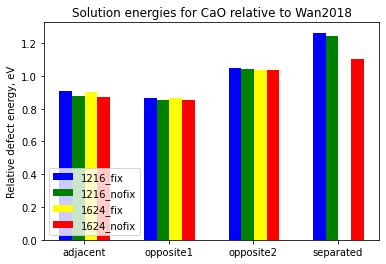

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_ca = [fix1216['./1216_fix/ca_adjacent.out'] + na2o - cao - 1.61, fix1216['./1216_fix/ca_opposite1.out'] + na2o - cao - 1.56, 
                    fix1216['./1216_fix/ca_opposite2.out'] + na2o - cao - 1.82, fix1216['./1216_fix/ca_seperated.out'] + na2o - cao - 1.67]
nofix1216_ca = [nofix1216['./1216_nofix/ca_adjacent.out'] + na2o - cao - 1.61, nofix1216['./1216_nofix/ca_opposite1.out'] + na2o - cao - 1.56, 
                      nofix1216['./1216_nofix/ca_opposite2.out'] + na2o - cao - 1.82, nofix1216['./1216_nofix/ca_seperated.out'] + na2o - cao - 1.67]
fix1624_ca = [fix1624['./1624_fix/ca_adjacent.out'] + na2o - cao - 1.61, fix1624['./1624_fix/ca_opposite1.out'] + na2o - cao - 1.56, 
                    fix1624['./1624_fix/ca_opposite2.out'] + na2o - cao - 1.82, 0]
nofix1624_ca = [nofix1624['./1624_nofix/ca_adjacent.out'] + na2o - cao - 1.61, nofix1624['./1624_nofix/ca_opposite1.out'] + na2o - cao - 1.56, 
                      nofix1624['./1624_nofix/ca_opposite2.out'] + na2o - cao - 1.82, nofix1624['./1624_nofix/ca_seperated.out'] + na2o - cao - 1.67]
wan = [1.61, 1.56, 1.82, 1.67]

labels = ['adjacent', 'opposite1', 'opposite2', 'separated']

barWidth = 0.15

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_ca, width = 0.15, color='blue')
plt.bar(r2, nofix1216_ca, width = 0.15, color='green')
plt.bar(r3, fix1624_ca, width = 0.15, color='yellow')
plt.bar(r4, nofix1624_ca, width = 0.15, color='red')
plt.xticks([0.22, 1.22, 2.22, 3.22], labels)
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_fix', '1624_nofix', 'Wan2018'], loc = 'lower left')
plt.title('Solution energies for CaO relative to Wan2018')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/ca_relative.jpg', bbox_inches='tight', dpi=500)

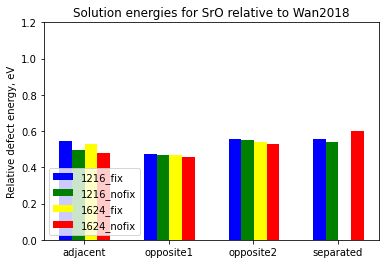

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_sr = [fix1216['./1216_fix/sr_adjacent.out'] + na2o - sro - 1.28, fix1216['./1216_fix/sr_opposite1.out'] + na2o - sro - 1.35, 
                    fix1216['./1216_fix/sr_opposite2.out'] + na2o - sro - 1.61, fix1216['./1216_fix/sr_seperated.out'] + na2o - sro - 1.44]
nofix1216_sr = [nofix1216['./1216_nofix/sr_adjacent.out'] + na2o - sro - 1.28, nofix1216['./1216_nofix/sr_opposite1.out'] + na2o - sro - 1.35, 
                      nofix1216['./1216_nofix/sr_opposite2.out'] + na2o - sro - 1.61, nofix1216['./1216_nofix/sr_seperated.out'] + na2o - sro - 1.44]
fix1624_sr = [fix1624['./1624_fix/sr_adjacent.out'] + na2o - sro - 1.28, fix1624['./1624_fix/sr_opposite1.out'] + na2o - sro - 1.35, 
                    fix1624['./1624_fix/sr_opposite2.out'] + na2o - sro - 1.61, 0]
nofix1624_sr = [nofix1624['./1624_nofix/sr_adjacent.out'] + na2o - sro - 1.28, nofix1624['./1624_nofix/sr_opposite1.out'] + na2o - sro - 1.35, 
                      nofix1624['./1624_nofix/sr_opposite2.out'] + na2o - sro - 1.61, nofix1624['./1624_nofix/sr_seperated.out'] + na2o - sro - 1.44]
wan = [1.28, 1.35, 1.61, 1.44]

labels = ['adjacent', 'opposite1', 'opposite2', 'separated']

barWidth = 0.15

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_sr, width = 0.15, color='blue')
plt.bar(r2, nofix1216_sr, width = 0.15, color='green')
plt.bar(r3, fix1624_sr, width = 0.15, color='yellow')
plt.bar(r4, nofix1624_sr, width = 0.15, color='red')
plt.xticks([0.22, 1.22, 2.22, 3.22], labels)
plt.ylabel('Relative defect energy, eV')
plt.ylim(0, 1.2)
plt.legend(labels=['1216_fix', '1216_nofix', '1624_fix', '1624_nofix', 'Wan2018'], loc = 'lower left')
plt.title('Solution energies for SrO relative to Wan2018')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/sr_relative.jpg', bbox_inches='tight', dpi=500)

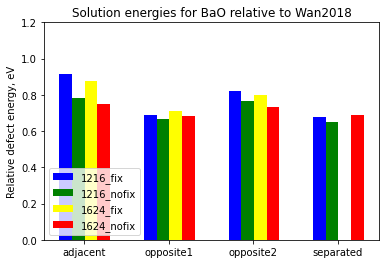

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_ba = [fix1216['./1216_fix/ba_adjacent.out'] + na2o - bao - 0.773, fix1216['./1216_fix/ba_opposite1.out'] + na2o - bao - 1.06, 
                    fix1216['./1216_fix/ba_opposite2.out'] + na2o - bao - 1.23, fix1216['./1216_fix/ba_seperated.out'] + na2o - bao - 1.19]
nofix1216_ba = [nofix1216['./1216_nofix/ba_adjacent.out'] + na2o - bao - 0.773, nofix1216['./1216_nofix/ba_opposite1.out'] + na2o - bao - 1.06, 
                      nofix1216['./1216_nofix/ba_opposite2.out'] + na2o - bao - 1.23, nofix1216['./1216_nofix/ba_seperated.out'] + na2o - bao - 1.19]
fix1624_ba = [fix1624['./1624_fix/ba_adjacent.out'] + na2o - bao - 0.773, fix1624['./1624_fix/ba_opposite1.out'] + na2o - bao - 1.06, 
                    fix1624['./1624_fix/ba_opposite2.out'] + na2o - bao - 1.23, 0]
nofix1624_ba = [nofix1624['./1624_nofix/ba_adjacent.out'] + na2o - bao - 0.773, nofix1624['./1624_nofix/ba_opposite1.out'] + na2o - bao - 1.06, 
                      nofix1624['./1624_nofix/ba_opposite2.out'] + na2o - bao - 1.23, nofix1624['./1624_nofix/ba_seperated.out'] + na2o - bao - 1.19]
wan = [0.773, 1.06, 1.23, 1.19]

labels = ['adjacent', 'opposite1', 'opposite2', 'separated']

barWidth = 0.15

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_ba, width = 0.15, color='blue')
plt.bar(r2, nofix1216_ba, width = 0.15, color='green')
plt.bar(r3, fix1624_ba, width = 0.15, color='yellow')
plt.bar(r4, nofix1624_ba, width = 0.15, color='red')
plt.xticks([0.22, 1.22, 2.22, 3.22], labels)
plt.ylabel('Relative defect energy, eV')
plt.ylim(0, 1.2)
plt.legend(labels=['1216_fix', '1216_nofix', '1624_fix', '1624_nofix', 'Wan2018'], loc = 'lower left')
plt.title('Solution energies for BaO relative to Wan2018')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/ba_relative.jpg', bbox_inches='tight', dpi=500)

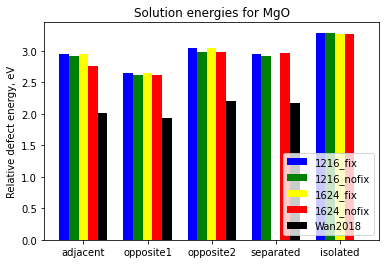

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_mg = [fix1216['./1216_fix/mg_adjacent.out'] + na2o - mgo, fix1216['./1216_fix/mg_opposite1.out'] + na2o - mgo, 
                    fix1216['./1216_fix/mg_opposite2.out'] + na2o - mgo, fix1216['./1216_fix/mg_seperated.out'] + na2o - mgo,
                    fix1216['./1216_fix/na3ocl_mg_dop.out'] + fix1216['./1216_fix/na3ocl_na_vac.out'] + na2o - mgo]
nofix1216_mg = [nofix1216['./1216_nofix/mg_adjacent.out'] + na2o - mgo, nofix1216['./1216_nofix/mg_opposite1.out'] + na2o - mgo, 
                      nofix1216['./1216_nofix/mg_opposite2.out'] + na2o - mgo, nofix1216['./1216_nofix/mg_seperated.out'] + na2o - mgo,
                      nofix1216['./1216_nofix/na3ocl_mg_dop.out'] + nofix1216['./1216_nofix/na3ocl_na_vac.out'] + na2o - mgo]
fix1624_mg = [fix1624['./1624_fix/mg_adjacent.out'] + na2o - mgo, fix1624['./1624_fix/mg_opposite1.out'] + na2o - mgo, 
                    fix1624['./1624_fix/mg_opposite2.out'] + na2o - mgo, 0,
                    fix1624['./1624_fix/na3ocl_mg_dop.out'] + fix1624['./1624_fix/na3ocl_na_vac.out'] + na2o - mgo]
nofix1624_mg = [nofix1624['./1624_nofix/mg_adjacent.out'] + na2o - mgo, nofix1624['./1624_nofix/mg_opposite1.out'] + na2o - mgo, 
                      nofix1624['./1624_nofix/mg_opposite2.out'] + na2o - mgo, nofix1624['./1624_nofix/mg_seperated.out'] + na2o - mgo,
                      nofix1624['./1624_nofix/na3ocl_mg_dop.out'] + nofix1624['./1624_nofix/na3ocl_na_vac.out'] + na2o - mgo]
wan = [2.01, 1.93, 2.21, 2.18, 0]

labels = ['adjacent', 'opposite1', 'opposite2', 'separated', 'isolated']

barWidth = 0.15

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_mg, width = 0.15, color='blue')
plt.bar(r2, nofix1216_mg, width = 0.15, color='green')
plt.bar(r3, fix1624_mg, width = 0.15, color='yellow')
plt.bar(r4, nofix1624_mg, width = 0.15, color='red')
plt.bar(r5, wan, width = 0.15, color='black')
plt.xticks([0.3, 1.3, 2.3, 3.3, 4.3], labels)
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_fix', '1624_nofix', 'Wan2018'], loc = 'lower right')
plt.title('Solution energies for MgO')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/mg_absolute.jpg', bbox_inches='tight', dpi=500)

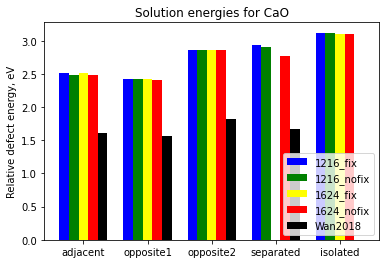

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_ca = [fix1216['./1216_fix/ca_adjacent.out'] + na2o - cao, fix1216['./1216_fix/ca_opposite1.out'] + na2o - cao, 
                    fix1216['./1216_fix/ca_opposite2.out'] + na2o - cao, fix1216['./1216_fix/ca_seperated.out'] + na2o - cao,
                    fix1216['./1216_fix/na3ocl_ca_dop.out'] + fix1216['./1216_fix/na3ocl_na_vac.out'] + na2o - cao]
nofix1216_ca = [nofix1216['./1216_nofix/ca_adjacent.out'] + na2o - cao, nofix1216['./1216_nofix/ca_opposite1.out'] + na2o - cao, 
                      nofix1216['./1216_nofix/ca_opposite2.out'] + na2o - cao, nofix1216['./1216_nofix/ca_seperated.out'] + na2o - cao,
                      nofix1216['./1216_nofix/na3ocl_ca_dop.out'] + nofix1216['./1216_nofix/na3ocl_na_vac.out'] + na2o - cao]
fix1624_ca = [fix1624['./1624_fix/ca_adjacent.out'] + na2o - cao, fix1624['./1624_fix/ca_opposite1.out'] + na2o - cao, 
                    fix1624['./1624_fix/ca_opposite2.out'] + na2o - cao, 0,
                    fix1624['./1624_fix/na3ocl_ca_dop.out'] + fix1624['./1624_fix/na3ocl_na_vac.out'] + na2o - cao]
nofix1624_ca = [nofix1624['./1624_nofix/ca_adjacent.out'] + na2o - cao, nofix1624['./1624_nofix/ca_opposite1.out'] + na2o - cao, 
                      nofix1624['./1624_nofix/ca_opposite2.out'] + na2o - cao, nofix1624['./1624_nofix/ca_seperated.out'] + na2o - cao,
                      nofix1624['./1624_nofix/na3ocl_ca_dop.out'] + nofix1624['./1624_nofix/na3ocl_na_vac.out'] + na2o - cao]
wan = [1.61, 1.56, 1.82, 1.67, 0]

labels = ['adjacent', 'opposite1', 'opposite2', 'separated', 'isolated']

barWidth = 0.15

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_ca, width = 0.15, color='blue')
plt.bar(r2, nofix1216_ca, width = 0.15, color='green')
plt.bar(r3, fix1624_ca, width = 0.15, color='yellow')
plt.bar(r4, nofix1624_ca, width = 0.15, color='red')
plt.bar(r5, wan, width = 0.15, color='black')
plt.xticks([0.3, 1.3, 2.3, 3.3, 4.3], labels)
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_fix', '1624_nofix', 'Wan2018'], loc = 'lower right')
plt.title('Solution energies for CaO')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/ca_absolute.jpg', bbox_inches='tight', dpi=500)

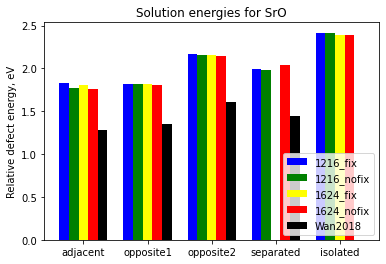

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_sr = [fix1216['./1216_fix/sr_adjacent.out'] + na2o - sro, fix1216['./1216_fix/sr_opposite1.out'] + na2o - sro, 
                    fix1216['./1216_fix/sr_opposite2.out'] + na2o - sro, fix1216['./1216_fix/sr_seperated.out'] + na2o - sro,
                    fix1216['./1216_fix/na3ocl_sr_dop.out'] + fix1216['./1216_fix/na3ocl_na_vac.out'] + na2o - sro]
nofix1216_sr = [nofix1216['./1216_nofix/sr_adjacent.out'] + na2o - sro, nofix1216['./1216_nofix/sr_opposite1.out'] + na2o - sro, 
                      nofix1216['./1216_nofix/sr_opposite2.out'] + na2o - sro, nofix1216['./1216_nofix/sr_seperated.out'] + na2o - sro,
                      nofix1216['./1216_nofix/na3ocl_sr_dop.out'] + nofix1216['./1216_nofix/na3ocl_na_vac.out'] + na2o - sro]
fix1624_sr = [fix1624['./1624_fix/sr_adjacent.out'] + na2o - sro, fix1624['./1624_fix/sr_opposite1.out'] + na2o - sro, 
                    fix1624['./1624_fix/sr_opposite2.out'] + na2o - sro, 0,
                    fix1624['./1624_fix/na3ocl_sr_dop.out'] + fix1624['./1624_fix/na3ocl_na_vac.out'] + na2o - sro]
nofix1624_sr = [nofix1624['./1624_nofix/sr_adjacent.out'] + na2o - sro, nofix1624['./1624_nofix/sr_opposite1.out'] + na2o - sro, 
                      nofix1624['./1624_nofix/sr_opposite2.out'] + na2o - sro, nofix1624['./1624_nofix/sr_seperated.out'] + na2o - sro,
                      nofix1624['./1624_nofix/na3ocl_sr_dop.out'] + nofix1624['./1624_nofix/na3ocl_na_vac.out'] + na2o - sro]
wan = [1.28, 1.35, 1.61, 1.44, 0]

labels = ['adjacent', 'opposite1', 'opposite2', 'separated', 'isolated']

barWidth = 0.15

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_sr, width = 0.15, color='blue')
plt.bar(r2, nofix1216_sr, width = 0.15, color='green')
plt.bar(r3, fix1624_sr, width = 0.15, color='yellow')
plt.bar(r4, nofix1624_sr, width = 0.15, color='red')
plt.bar(r5, wan, width = 0.15, color='black')
plt.xticks([0.3, 1.3, 2.3, 3.3, 4.3], labels)
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_fix', '1624_nofix', 'Wan2018'], loc = 'lower right')
plt.title('Solution energies for SrO')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/sr_absolute.jpg', bbox_inches='tight', dpi=500)

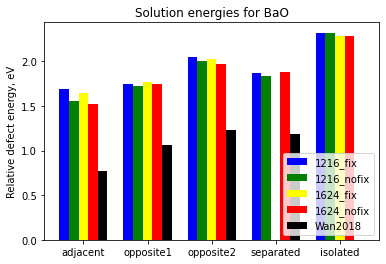

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

fix1216_ba = [fix1216['./1216_fix/ba_adjacent.out'] + na2o - bao, fix1216['./1216_fix/ba_opposite1.out'] + na2o - bao, 
                    fix1216['./1216_fix/ba_opposite2.out'] + na2o - bao, fix1216['./1216_fix/ba_seperated.out'] + na2o - bao,
                    fix1216['./1216_fix/na3ocl_ba_dop.out'] + fix1216['./1216_fix/na3ocl_na_vac.out'] + na2o - bao]
nofix1216_ba = [nofix1216['./1216_nofix/ba_adjacent.out'] + na2o - bao, nofix1216['./1216_nofix/ba_opposite1.out'] + na2o - bao, 
                      nofix1216['./1216_nofix/ba_opposite2.out'] + na2o - bao, nofix1216['./1216_nofix/ba_seperated.out'] + na2o - bao,
                      nofix1216['./1216_nofix/na3ocl_ba_dop.out'] + nofix1216['./1216_nofix/na3ocl_na_vac.out'] + na2o - bao]
fix1624_ba = [fix1624['./1624_fix/ba_adjacent.out'] + na2o - bao, fix1624['./1624_fix/ba_opposite1.out'] + na2o - bao, 
                    fix1624['./1624_fix/ba_opposite2.out'] + na2o - bao, 0,
                    fix1624['./1624_fix/na3ocl_ba_dop.out'] + fix1624['./1624_fix/na3ocl_na_vac.out'] + na2o - bao]
nofix1624_ba = [nofix1624['./1624_nofix/ba_adjacent.out'] + na2o - bao, nofix1624['./1624_nofix/ba_opposite1.out'] + na2o - bao, 
                      nofix1624['./1624_nofix/ba_opposite2.out'] + na2o - bao, nofix1624['./1624_nofix/ba_seperated.out'] + na2o - bao,
                      nofix1624['./1624_nofix/na3ocl_ba_dop.out'] + nofix1624['./1624_nofix/na3ocl_na_vac.out'] + na2o - bao]
wan = [0.773, 1.06, 1.23, 1.19, 0]

labels = ['adjacent', 'opposite1', 'opposite2', 'separated', 'isolated']

barWidth = 0.15

r1 = np.arange(len(wan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, fix1216_ba, width = 0.15, color='blue')
plt.bar(r2, nofix1216_ba, width = 0.15, color='green')
plt.bar(r3, fix1624_ba, width = 0.15, color='yellow')
plt.bar(r4, nofix1624_ba, width = 0.15, color='red')
plt.bar(r5, wan, width = 0.15, color='black')
plt.xticks([0.3, 1.3, 2.3, 3.3, 4.3], labels)
plt.ylabel('Relative defect energy, eV')
plt.legend(labels=['1216_fix', '1216_nofix', '1624_fix', '1624_nofix', 'Wan2018'], loc = 'lower right')
plt.title('Solution energies for BaO')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/ba_absolute.jpg', bbox_inches='tight', dpi=500)

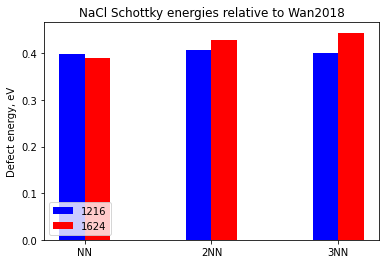

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

x1216_schottky = [fix1216['./1216_fix/NN.out'] + nacl - 1.24, fix1216['./1216_fix/2NN.out'] + nacl - 1.18, fix1216['./1216_fix/3NN.out'] + nacl - 1.28]
x1624_schottky = [fix1624['./1624_fix/NN.out'] + nacl - 1.24, fix1624['./1624_fix/2NN.out'] + nacl - 1.18, fix1624['./1624_fix/3NN.out'] + nacl - 1.28]

wan = [1.24, 1.18, 1.28]

labels = ['NN', '2NN', '3NN']

barWidth = 0.2

r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, x1216_schottky, width = 0.2, color='blue')
plt.bar(r2, x1624_schottky, width = 0.2, color='red')
plt.xticks([0.1, 1.1, 2.1], labels)
plt.ylabel('Defect energy, eV')
plt.legend(labels=['1216', '1624', 'Wan2018'], loc = 'lower left')
plt.title('NaCl Schottky energies relative to Wan2018')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/schottky_nacl_relative.jpg', bbox_inches='tight', dpi=500)

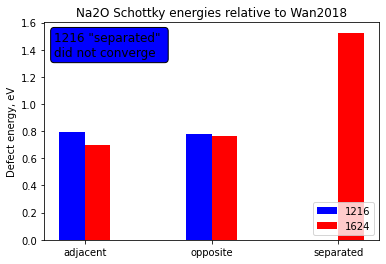

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

fix1216 = energyList('./1216_fix/*.out')
nofix1216 = energyList('./1216_nofix/*.out')
fix1624 = energyList('./1624_fix/*.out')
nofix1624 = energyList('./1624_nofix/*.out')

x1216_schottky = [fix1216['./1216_fix/na2o_adjacent.out'] + na2o - 1.74, fix1216['./1216_fix/na2o_opposite.out'] + na2o - 1.88, 0]
x1624_schottky = [fix1624['./1624_fix/na2o_adjacent.out'] + na2o - 1.74, fix1624['./1624_fix/na2o_opposite.out'] + na2o - 1.88, fix1624['./1624_fix/na2o_separated.out'] + na2o - 2.52]

wan = [1.74, 1.88, 2.52]

labels = ['adjacent', 'opposite', 'separated']

barWidth = 0.2

r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig, ax = plt.subplots()

plt.bar(r1, x1216_schottky, width = 0.2, color='blue')
plt.bar(r2, x1624_schottky, width = 0.2, color='red')
plt.xticks([0.1, 1.1, 2.1], labels)
plt.ylabel('Defect energy, eV')
plt.legend(labels=['1216', '1624', 'Wan2018'], loc = 'lower right')
plt.title('Na2O Schottky energies relative to Wan2018')

textstr = '1216 "separated" \ndid not converge'

ax.text(0.03, 0.96, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='blue', edgecolor='black', boxstyle='round'))

plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/meeting_5_15022021/schottky_na2o_relative.jpg', bbox_inches='tight', dpi=500)